<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=1000, # 1000 observations
    n_features=3, # 3 total features
     n_redundant=1,
    n_classes=2, # binary target/label
    random_state=999
)

<Axes: >

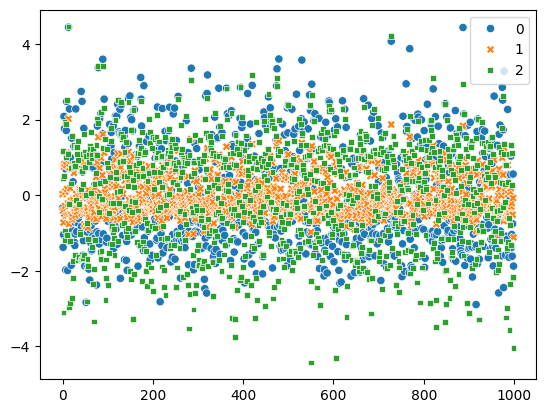

In [74]:
sns.scatterplot(x)

<Axes: >

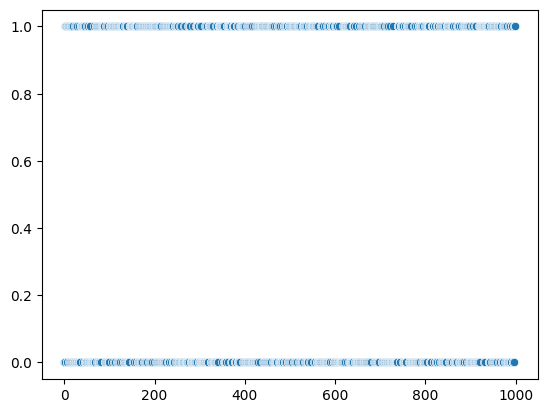

In [75]:
sns.scatterplot(y)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred=classifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [80]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [81]:
#hyperparameter
from sklearn.model_selection import GridSearchCV
parameters={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid=GridSearchCV(KNeighborsClassifier(),parameters,verbose=3)

In [82]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.873 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.866 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.858 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.873 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.866 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.858 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.888 total time=   0.0s
[CV

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [83]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [84]:
grid.best_score_

0.9029850746268657